In [1]:
from SimPEG import PF, Mesh
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import MultiPoint, Point
from matplotlib import path

In [2]:
workDir = 'C:\\Users\\DominiqueFournier\\Downloads\\S_Lp_iteration4\\'
meshFile = 'mesh_core.msh'
modelFile = 'Tongairo_S_LP_amp_core.mod'

mesh = Mesh.TensorMesh.readUBC(workDir + meshFile)
model = Mesh.TensorMesh.readModelUBC(mesh, workDir + modelFile)

points = np.loadtxt(workDir + "Locs.xyz")
# points = Point((points[:,0],points[:,1]))


In [3]:
def readVectorUBC(mesh, fileName):
    """Read UBC 3DVector model and generate 3D Vector mesh model

    Input:
    :param string fileName: path to the UBC GIF mesh file to read

    Output:
    :rtype: numpy.ndarray
    :return: model with TensorMesh ordered x3 nC
    """
    model = np.loadtxt(fileName)
    # Fist line is the size of the model
    # model = np.array(model.ravel()[0].split(), dtype=float)

    vx = np.reshape(model[:, 0], (mesh.nCz, mesh.nCx, mesh.nCy), order='F')
    vx = vx[::-1, :, :]
    vx = np.transpose(vx, (1, 2, 0))
    vx = mkvc(vx)

    vy = np.reshape(model[:, 1], (mesh.nCz, mesh.nCx, mesh.nCy), order='F')
    vy = vy[::-1, :, :]
    vy = np.transpose(vy, (1, 2, 0))
    vy = mkvc(vy)

    vz = np.reshape(model[:, 2], (mesh.nCz, mesh.nCx, mesh.nCy), order='F')
    vz = vz[::-1, :, :]
    vz = np.transpose(vz, (1, 2, 0))
    vz = mkvc(vz)

    model = np.r_[vx, vy, -vz]
    return model


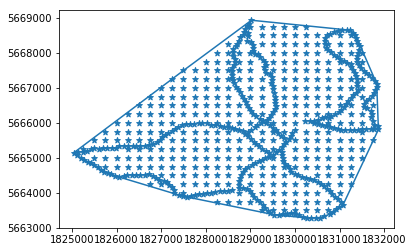

In [4]:

# coords is a list of (x, y) tuples
poly = MultiPoint(points).convex_hull

xy = np.c_[poly.boundary.xy]
plt.scatter(points[:,0], points[:,1],marker='*')
plt.plot(xy[:,0], xy[:,1])
plt.show()

In [5]:
# Trim model outside the hull 
p = path.Path(xy) 
outside = p.contains_points(mesh.gridCC[:,:2]) == False

In [6]:
model[outside] = -100
Mesh.TensorMesh.writeModelUBC(mesh, workDir + modelFile[:-5] + 'ConvexHull' + modelFile[-5:], model)

In [1]:
import numpy as np
aa=np.asarray(range(3))
np.kron(np.ones(2),aa)

array([ 0.,  1.,  2.,  0.,  1.,  2.])